In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from brokenaxes import brokenaxes
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
import random as rn
import tensorflow as tf
#PYTHONHASHSEED=0
#tf.random.set_seed(1234)
np.random.seed(1234)
rn.seed(1254)
import warnings
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv("c2h4_final_data_phi_1.csv")

In [22]:
data = data[data['b'] <= 6.5]

In [23]:
data_process = data.copy()    #to keep original datafile intact
#data_process.replace([np.NaN], 0, inplace=True)
data_process.fillna(data_process.mode().iloc[0], inplace=True)  # Mode imputation
data_process["react_type"].replace({"1": "I", "2": "II"}, inplace=True)
#data_process["react_type"].replace({"3A": "31", "3B": "32", "4A" : "41", "4B" : "42", "4C" : "43" , "5A" : "51", "5B" : "52", "5C" : "53", "VI" : "6", "unk" : "0"}, inplace=True)
#final_data = data_process.groupby('react_type').filter(lambda x : len(x)>1)
X_data = data_process[['Alpha', 'Beta', 'Gamma', 'b']]
y_data = data_process[['react_type']].values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, stratify=y_data, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = np.ravel(y_train)
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
print('trained dataset counts', Counter(y_train_res))

trained dataset counts Counter({'I': 5559, '4A': 5559, '3A': 5559, '5B': 5559, 'II': 5559, '4B': 5559, 'unk': 5559, '3B': 5559, '5C': 5559, '4C': 5559, 'VI': 5559})


In [24]:
models = []

In [26]:
models = []
models.append(('SVC', SVC()))
models.append(('Decision_Tree', DecisionTreeClassifier(class_weight='balanced', max_depth=5)))
models.append(('Random_forest', RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10, max_features=1)))
models.append(('KNN', KNeighborsClassifier(3)))
models.append(('AdaBoost', AdaBoostClassifier(learning_rate=0.01)))
models.append(('Nearest_neighbour', NearestCentroid()))
models.append(('Naive_bayes', Pipeline([('Normalizing', MinMaxScaler()), ('MultinomialNB', MultinomialNB())])))
models.append(('Voting', VotingClassifier(estimators=[('SVC', SVC()), ('KNN', KNeighborsClassifier(3)), ('RF', RandomForestClassifier())])))
models.append(('XGBoost', GradientBoostingClassifier()))


In [27]:
names = []
scores = []
precision_scores = []
model_list = []

In [28]:
for name, model in models:
    model_list.append(model)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    prec_score = precision_score(y_test, y_pred, average='micro')
    rec_score = recall_score(y_test, y_pred, average='micro')
    f1_scores = f1_score(y_test, y_pred, average='micro')
    names.append(name)
    print('%s Accuracy: %f' % (name, score))
    print('%s Precision: %f' % (name, prec_score))
    print('%s Recall: %f' % (name, rec_score))
    print('%s F1-Score: %f' % (name, f1_scores))
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

SVC Accuracy: 0.681187
SVC Precision: 0.681187
SVC Recall: 0.681187
SVC F1-Score: 0.681187
Classification Report:
               precision    recall  f1-score   support

          3A       0.37      0.73      0.49        49
          3B       0.00      0.00      0.00         5
          4A       0.25      0.64      0.36       103
          4B       0.12      0.74      0.20        19
          4C       0.00      0.00      0.00         1
          5B       0.00      0.00      0.00         2
          5C       0.00      0.00      0.00         1
           I       1.00      0.69      0.81      1389
          II       0.24      0.80      0.36        10
          VI       0.00      0.00      0.00         2
         unk       0.02      0.33      0.03         3

    accuracy                           0.68      1584
   macro avg       0.18      0.36      0.21      1584
weighted avg       0.91      0.68      0.76      1584

Decision_Tree Accuracy: 0.580177
Decision_Tree Precision: 0.580177
Decis

In [15]:
v = max(scores)
m = scores.index(v)
final_model = model_list[m]
print('Best model found :', final_model)

Best model found : KNeighborsClassifier(n_neighbors=3)


In [16]:
BM = model_list[m].__class__
print(BM)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [17]:
k_values = [i for i in range (2,11)]

In [18]:
score_best_model = []

In [19]:
for k in k_values:
    #knn = KNeighborsClassifier(n_neighbors=k)
    BM_final = BM(n_neighbors=k)
    score = cross_val_score(BM_final , X_train_res, y_train_res, cv=10)
    score_best_model.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

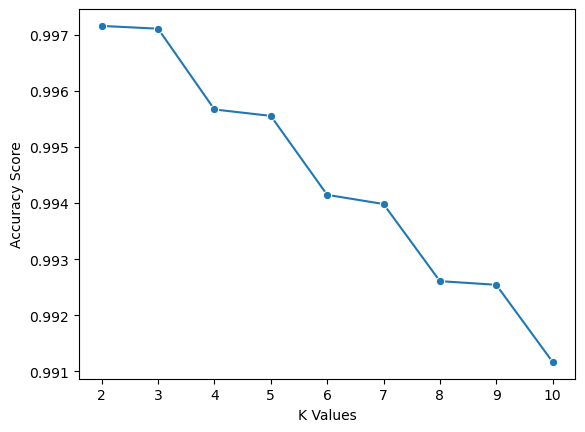

In [20]:
sns.lineplot(x = k_values, y = score_best_model, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [21]:
best_index = np.argmax(score_best_model)
best_k = k_values[best_index]
print(best_k)

2


In [22]:
K = BM(n_neighbors=best_k).fit(X_train_res, y_train_res)

In [23]:
y_pred = K.predict(X_test)

In [24]:
y_pred_train = K.predict(X_train_res)

In [25]:
best_score = accuracy_score(y_test, y_pred)

In [26]:
best_score

0.9532828282828283

In [27]:
best_score_train = accuracy_score(y_pred_train, y_train_res)

In [28]:
best_score_train

0.9988879621907145

In [29]:
y_test = y_test.flatten()

In [27]:
y_train_res = y_train_res.flatten()

In [30]:
counter_pred = Counter(y_pred)
counter_data = Counter(y_test)
x_1 = np.arange(0, len(counter_pred.values()))
x_test = np.arange(0, len(counter_data.values()))

In [31]:
counter_pred

Counter({'I': 1366,
         '3A': 49,
         '4A': 135,
         '4B': 19,
         'II': 10,
         'unk': 1,
         '5B': 2,
         '3B': 1,
         '5C': 1})

In [32]:
counter_data

Counter({'I': 1389,
         '3A': 49,
         '4A': 103,
         '4B': 19,
         'II': 10,
         '5C': 1,
         '3B': 5,
         '5B': 2,
         'unk': 3,
         'VI': 2,
         '4C': 1})

In [33]:
counter_data_sorted = {}
counter_pred_sorted = {}

sorted_keys = sorted(counter_data.keys())
for category in sorted_keys:
    counter_data_sorted[category] = counter_data[category]
    counter_pred_sorted[category] = counter_pred[category]

print("Sorted Counter Data:")
print(counter_data_sorted)
print()
print("Sorted Counter Predictions:")
print(counter_pred_sorted)

Sorted Counter Data:
{'3A': 49, '3B': 5, '4A': 103, '4B': 19, '4C': 1, '5B': 2, '5C': 1, 'I': 1389, 'II': 10, 'VI': 2, 'unk': 3}

Sorted Counter Predictions:
{'3A': 49, '3B': 1, '4A': 135, '4B': 19, '4C': 0, '5B': 2, '5C': 1, 'I': 1366, 'II': 10, 'VI': 0, 'unk': 1}


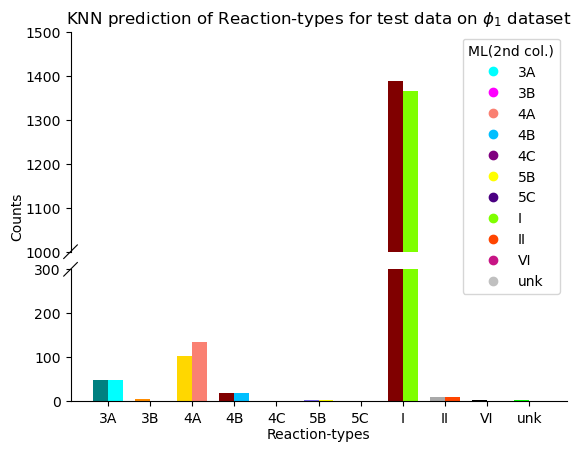

In [34]:

# Sort the data in descending order
#y_test_plot = sorted(counter_data.values(), reverse=True)
#y_data_plot = sorted(counter_pred.values(), reverse=True)

y_data_plot = list(counter_data_sorted.values())
y_pred_plot = list(counter_pred_sorted.values())

# Create an array of x-axis values
x_ticks_label_new = list(counter_data_sorted.keys())
x_test_new = np.arange(len(x_ticks_label_new))

# Set up the figure
width = 0.35  # the width of the bars
ind = np.arange(len(x_ticks_label_new))
baxes = brokenaxes(ylims=((0, 300), (1000, 1500)), hspace=.1)

# Define a list of colors for each category
colors_data = ['teal', 'darkorange', 'gold', 'maroon', 'dodgerblue', 'mediumslateblue', 'hotpink', 'maroon', 'darkgray', 'black', 'lime']

# Plot the original data bars
for i in range(len(x_ticks_label_new)):
    baxes.bar(ind[i] - width/2, y_data_plot[i], width, color=colors_data[i], label=x_ticks_label_new[i])

# Plot the predicted data bars with contrasting colors to colors_data
#colors_ml = ['cyan', 'magenta', 'lime', 'deepskyblue', 'purple', 'yellow', 'indigo', 'chartreuse', 'orangered', 'mediumvioletred', 'silver']
colors_ml = ['cyan', 'magenta', 'salmon', 'deepskyblue', 'purple', 'yellow', 'indigo', 'chartreuse', 'orangered', 'mediumvioletred', 'silver']

for i in range(len(x_ticks_label_new)):
    baxes.bar(ind[i] + width/2, y_pred_plot[i], width, color=colors_ml[i])

# Add labels and title
# Add some text for labels, title and custom x-axis tick labels, etc.
baxes.set_ylabel('Counts')
#baxes.set_title('Original vs. Predicted Counts for reaction-types for Phi1 dataset')
baxes.set_title(r'KNN prediction of Reaction-types for test data on $\phi_1$ dataset')
baxes.set_xticks(ind)
#baxes.set_xticklabels(np.arange(len(x_ticks_label_new)))
baxes.axs[1].set_xticks(x_test_new, x_ticks_label_new)
baxes.set_xlabel('Reaction-types')
baxes.legend()

# Create a custom legend for the ML prediction colors
ml_legend_elements = [plt.Line2D([0], [0], color=colors_ml[i], marker='o', linestyle='', label=x_ticks_label_new[i]) for i in range(len(x_ticks_label_new))]
baxes.legend(handles=ml_legend_elements, title='ML(2nd col.)', loc='upper right')

plt.savefig('KNN_results_phi1')
# Show the plot
plt.show()



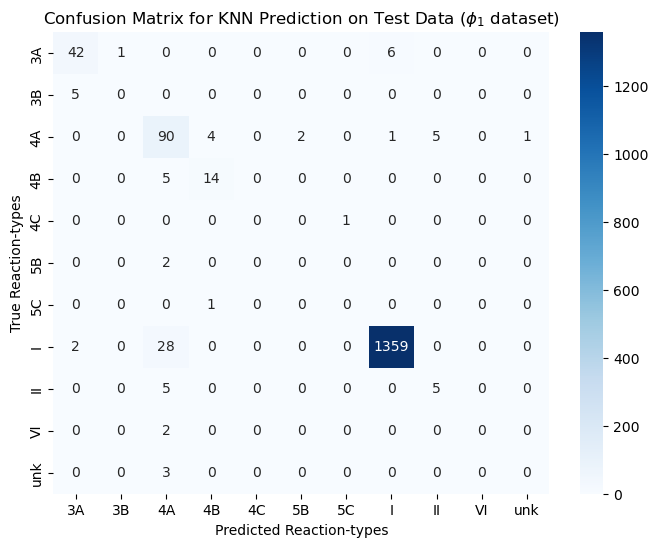

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have true labels (y_true) and predicted labels (y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
classes = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)

# Add labels, title, and axis ticks
plt.title('Confusion Matrix for KNN Prediction on Test Data ($\phi_1$ dataset)')
plt.xlabel('Predicted Reaction-types')
plt.ylabel('True Reaction-types')
plt.xticks(np.arange(len(classes)) + 0.5, classes)
plt.yticks(np.arange(len(classes)) + 0.5, classes)
plt.savefig("knn_conf_phi2_matrix")
# Show the plot
plt.show()


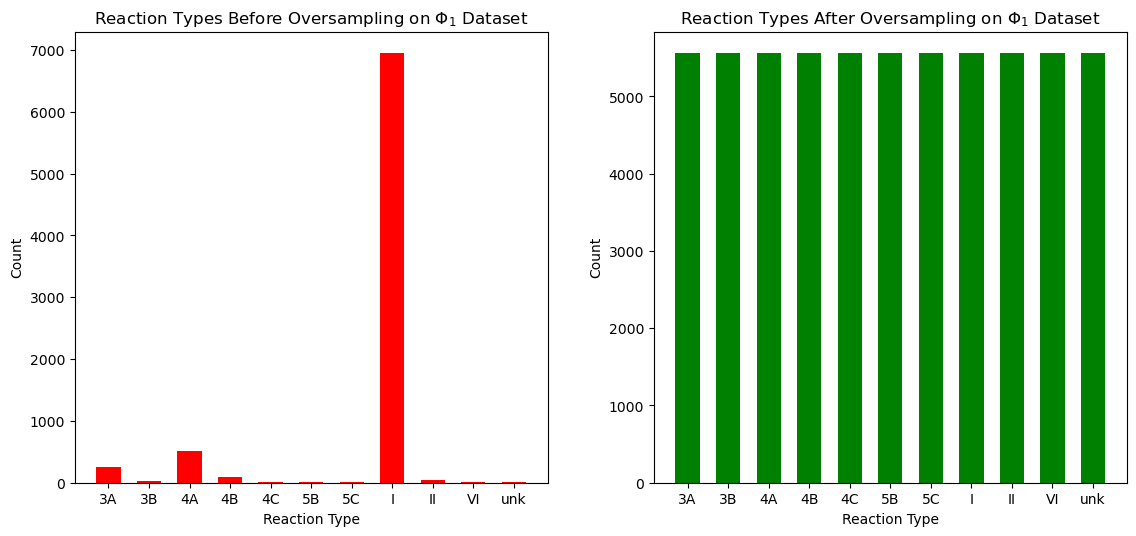

In [34]:
import matplotlib.pyplot as plt

# Calculate the unique reaction types and their counts before oversampling
unique_types, type_counts = np.unique(y_data, return_counts=True)

# Plotting reaction types before oversampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title(r'Reaction Types Before Oversampling on $\Phi_1$ Dataset')
plt.xlabel('Reaction Type')
plt.ylabel('Count')

# Calculate the width and spacing between bars
bar_width = 0.6
bar_spacing = 0.4

# Plot the bars before oversampling
plt.bar(range(len(unique_types)), type_counts, color='red', width=bar_width)
plt.xticks(range(len(unique_types)), unique_types)
plt.grid(False)

# Calculate the unique reaction types and their counts after oversampling
unique_types_res, type_counts_res = np.unique(y_train_res, return_counts=True)

# Plotting reaction types after oversampling
plt.subplot(1, 2, 2)
plt.title(r'Reaction Types After Oversampling on $\Phi_1$ Dataset')
plt.xlabel('Reaction Type')
plt.ylabel('Count')

# Plot the bars after oversampling with adjusted spacing
plt.bar(np.arange(len(unique_types_res)) + bar_spacing, type_counts_res, color='green', width=bar_width)
plt.xticks(np.arange(len(unique_types_res)) + bar_spacing, unique_types_res)
plt.grid(False)

# Adjusting subplot spacing
plt.tight_layout(pad=3.0)

plt.savefig('reaction_types_plot.png')

# Display the plots
plt.show()



In [64]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Get the unique class labels
classes = np.unique(y_test)

# Create an empty DataFrame
report_df = pd.DataFrame(columns=['Model'] + list(classes))

for name, model in models:
    model_list.append(model)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    prec_score = precision_score(y_test, y_pred, average='micro')
    rec_score = recall_score(y_test, y_pred, average='micro')
    names.append(name)
    print('%s Accuracy: %.2f' % (name, score))
    print('%s Precision: %.2f' % (name, prec_score))
    print('%s Recall: %.2f' % (name, rec_score))
    report = classification_report(y_test, y_pred, output_dict=True)
    report_dict = {'Model': name}

    for class_label in classes:
        class_report = report[str(class_label)]
        precision = float('{:.2f}'.format(class_report['precision'])[1:])
        recall = float('{:.2f}'.format(class_report['recall'])[1:])
        report_dict[class_label] = {'Precision': precision, 'Recall': recall}

    report_df = report_df.append(report_dict, ignore_index=True)

# Remove the curly braces '{}' from the classification report DataFrame
report_df = report_df.replace(to_replace=r"\{|\}", value='', regex=True)

# Save the classification report DataFrame as a tab-separated text file
report_df.to_csv('classification_report.txt', sep='\t', index=False)

# Display the classification report DataFrame
print(report_df)


SVC Accuracy: 0.68
SVC Precision: 0.68
SVC Recall: 0.68
Decision_Tree Accuracy: 0.58
Decision_Tree Precision: 0.58
Decision_Tree Recall: 0.58
Random_forest Accuracy: 0.60
Random_forest Precision: 0.60
Random_forest Recall: 0.60
KNN Accuracy: 0.95
KNN Precision: 0.95
KNN Recall: 0.95
AdaBoost Accuracy: 0.07
AdaBoost Precision: 0.07
AdaBoost Recall: 0.07
Nearest_neighbour Accuracy: 0.28
Nearest_neighbour Precision: 0.28
Nearest_neighbour Recall: 0.28
Naive_bayes Accuracy: 0.25
Naive_bayes Precision: 0.25
Naive_bayes Recall: 0.25
Voting Accuracy: 0.93
Voting Precision: 0.93
Voting Recall: 0.93
XGBoost Accuracy: 0.89
XGBoost Precision: 0.89
XGBoost Recall: 0.89
               Model                                   3A  \
0                SVC  {'Precision': 0.37, 'Recall': 0.73}   
1      Decision_Tree   {'Precision': 0.29, 'Recall': 0.9}   
2      Random_forest  {'Precision': 0.27, 'Recall': 0.92}   
3                KNN  {'Precision': 0.86, 'Recall': 0.86}   
4           AdaBoost    {'Pre

In [65]:
df =pd.DataFrame(report_df)

In [66]:
df

,Model,3A,3B,4A,4B,4C,5B,5C,I,II,VI,unk
0,SVC,"{'Precision': 0.37, 'Recall': 0.73}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.25, 'Recall': 0.64}","{'Precision': 0.12, 'Recall': 0.74}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.69}","{'Precision': 0.24, 'Recall': 0.8}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.02, 'Recall': 0.33}"
1,Decision_Tree,"{'Precision': 0.29, 'Recall': 0.9}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.15, 'Recall': 0.34}","{'Precision': 0.07, 'Recall': 0.63}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.08, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.59}","{'Precision': 0.15, 'Recall': 0.7}","{'Precision': 0.09, 'Recall': 0.0}","{'Precision': 0.02, 'Recall': 0.33}"
2,Random_forest,"{'Precision': 0.27, 'Recall': 0.92}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.29, 'Recall': 0.13}","{'Precision': 0.05, 'Recall': 0.63}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.62}","{'Precision': 0.13, 'Recall': 0.5}","{'Precision': 0.04, 'Recall': 0.0}","{'Precision': 0.04, 'Recall': 0.67}"
3,KNN,"{'Precision': 0.86, 'Recall': 0.86}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.67, 'Recall': 0.87}","{'Precision': 0.74, 'Recall': 0.74}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.99, 'Recall': 0.98}","{'Precision': 0.5, 'Recall': 0.5}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}"
4,AdaBoost,"{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.03, 'Recall': 0.0}","{'Precision': 0.31, 'Recall': 0.1}","{'Precision': 0.04, 'Recall': 0.63}","{'Precision': 0.03, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.06}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.02, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}"
5,Nearest_neighbour,"{'Precision': 0.24, 'Recall': 0.39}","{'Precision': 0.01, 'Recall': 0.2}","{'Precision': 0.04, 'Recall': 0.02}","{'Precision': 0.07, 'Recall': 0.37}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.29}","{'Precision': 0.03, 'Recall': 0.1}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}"
6,Naive_bayes,"{'Precision': 0.23, 'Recall': 0.61}","{'Precision': 0.03, 'Recall': 0.2}","{'Precision': 0.2, 'Recall': 0.13}","{'Precision': 0.02, 'Recall': 0.16}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.01, 'Recall': 0.0}","{'Precision': 0.97, 'Recall': 0.24}","{'Precision': 0.03, 'Recall': 0.2}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}"
7,Voting,"{'Precision': 0.82, 'Recall': 0.86}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.62, 'Recall': 0.87}","{'Precision': 0.64, 'Recall': 0.74}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.99, 'Recall': 0.96}","{'Precision': 0.33, 'Recall': 0.6}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}"
8,XGBoost,"{'Precision': 0.67, 'Recall': 0.94}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.53, 'Recall': 0.88}","{'Precision': 0.35, 'Recall': 0.79}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.5, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.0}","{'Precision': 0.0, 'Recall': 0.9}","{'Precision': 0.42, 'Recall': 0.0}","{'Precision': 0.5, 'Recall': 0.0}","{'Precision': 0.18, 'Recall': 0.67}"
